In [1]:
import pandas as pd
import numpy as np

import nltk

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15
plt.style.use('seaborn')
    
from pyScript import create_wordcloud, tweets_sentiment_analysis, column_to_piechart

In [2]:
data_20 = pd.read_csv('data_20_completed.csv')
data_20.head(1)

,Unnamed: 0,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo
0,0,1241180473344262144,/jimmyfallon/status/1241180473344262144,2020-03-21 01:50:59,I miss you bud!!! Love you!!,[],False,[],113,14,14,True,True


In [3]:
data_19 = pd.read_csv('data_19_completed.csv')
data_19.head(1)

,Unnamed: 0,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo
0,0,1108780905903149061,/jimmyfallon/status/1108780905903149061,2019-03-21 17:22:22,What a team you’ve got? Loved them. Crush it o...,[],False,[],1413,112,35,True,False


---

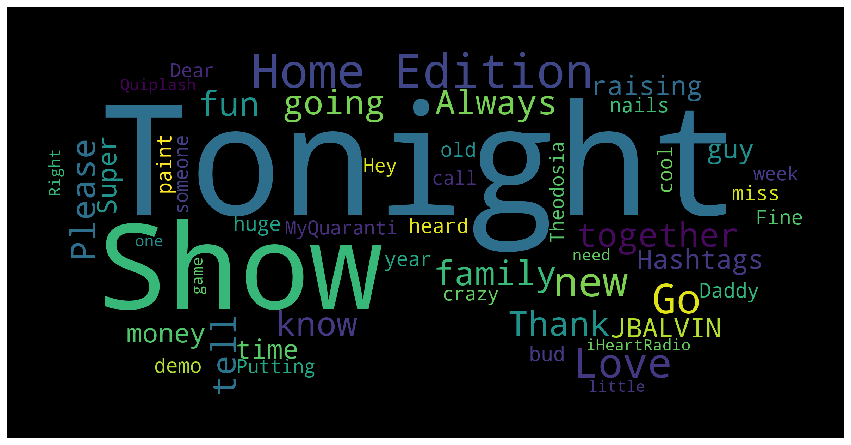

Top: 2020	|	Down: 2019


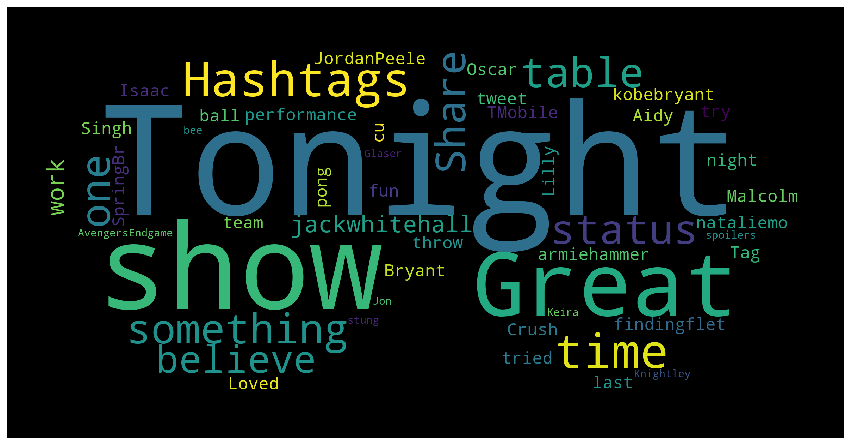

In [4]:
_stop_words = ['com', 'ha', 'AJ', 'nPing', 'end', 'gla', 'Na', 'https', 'scr', 'twitter', 'get', 'got', 'put', 'we\'ve']

_mask_image = np.array(Image.open('mask.png'))

create_wordcloud(data_20['text'], mask=_mask_image, stop_words=_stop_words)
print('Top: 2020\t|\tDown: 2019')
create_wordcloud(data_19['text'], mask=_mask_image, stop_words=_stop_words)

---

In [5]:
data_20['Positivity'] = data_20.text.apply(tweets_sentiment_analysis)
data_20.head(2)

,Unnamed: 0,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo,Positivity
0,0,1241180473344262144,/jimmyfallon/status/1241180473344262144,2020-03-21 01:50:59,I miss you bud!!! Love you!!,[],False,[],113,14,14,True,True,0.781250
1,1,1241079393683943424,/jimmyfallon/status/1241079393683943424,2020-03-20 19:09:20,That was very cool. We heard you!Thank you to ...,['CowbellChallenge'],False,[],2716,224,160,True,False,0.422812


In [6]:
data_19['Positivity'] = data_19.text.apply(tweets_sentiment_analysis)
data_19.head(2)

,Unnamed: 0,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo,Positivity
0,0,1108780905903149061,/jimmyfallon/status/1108780905903149061,2019-03-21 17:22:22,What a team you’ve got? Loved them. Crush it o...,[],False,[],1413,112,35,True,False,0.700000
1,1,1108390399364812800,/jimmyfallon/status/1108390399364812800,2019-03-20 15:30:38,Great performance last night from @findingflet...,['FallonTonight'],False,[],1727,188,39,True,False,0.214583


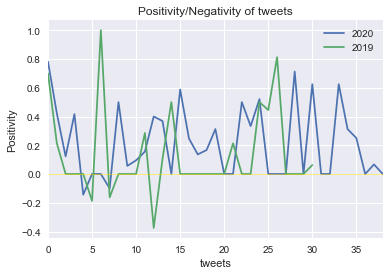

In [7]:
data_20.Positivity.plot(label='2020')
data_19.Positivity.plot(label='2019')
plt.title('Positivity/Negativity of tweets')
plt.xlabel('tweets')
plt.ylabel('Positivity')
plt.axhline(0, color='gold', lw=.5)
plt.legend()

In [8]:
data_19.sort_values(by='Positivity', ascending=False).head(1)

,Unnamed: 0,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo,Positivity
6,6,1107780782230249472,/jimmyfallon/status/1107780782230249472,2019-03-18 23:08:14,"Great show tonight: @JordanPeele, Malcolm @Gla...","['MarchMadness', 'FallonTonight']",False,[],1091,86,102,True,False,1.0


In [9]:
data_19.sort_values(by='Positivity', ascending=True).head(1)

,Unnamed: 0,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo,Positivity
12,12,1105186626496577537,/jimmyfallon/status/1105186626496577537,2019-03-11 19:19:59,It’s Hashtags time! Share a funny or weird sto...,['MyBadLuck'],False,[],3041,204,1360,True,False,-0.375


In [10]:
data_20.sort_values(by='Positivity', ascending=False).head(1)

,Unnamed: 0,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo,Positivity
0,0,1241180473344262144,/jimmyfallon/status/1241180473344262144,2020-03-21 01:50:59,I miss you bud!!! Love you!!,[],False,[],113,14,14,True,True,0.78125


In [11]:
data_20.sort_values(by='Positivity', ascending=True).head(1)

,Unnamed: 0,tweetId,tweetUrl,timestamp,text,hashtags,hasMedia,imgUrl,likes,retweets,replies,isReplied,isReplyTo,Positivity
4,4,1240431255503724547,/jimmyfallon/status/1240431255503724547,2020-03-19 00:13:52,"Hey guys. It's been a crazy week, so for our f...",['MyQuarantineInSixWords'],False,[],6405,473,3461,True,False,-0.14375


---

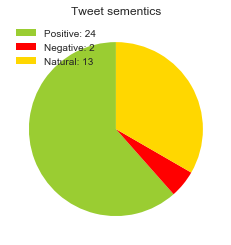

In [12]:
column_to_piechart(data_20['Positivity'])

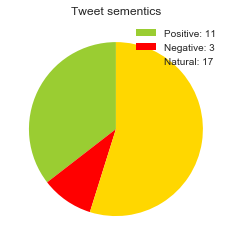

In [13]:
column_to_piechart(data_19['Positivity'])